In [ ]:
from IPython.core.display import display_html
display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)

In [1]:
from sys import path; path.insert(1,"../src");
import fubar; from importlib import reload; reload(fubar);

***
< [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/nkp-network-services/blob/main/README.md) >

## CompTIA Network+ - Course Material 2022
### Topic: ``Network Services``
***

Course material for the ``CompTIA Network+`` module of the ``ICT Associate Apprenticeship (Cybersecurity)`` programme.

In [2]:
# from sys import path; path.insert(1,"../src")
# from fubar import fFile

In [3]:
%%script bash
grep -1 "def fFile" ../src/fubar.py -A 9

# repository ./SeanOhAileasa
def fFile(nParPath):
    """Start a file with its associated application.

Input: nParPath
Process: (os.path.realpath; os.startfile)
Output: file opened with associated application
"""
    from os import path,startfile
    return startfile(path.realpath(nParPath))
# --- END ---


<a id="top"></a>
***
## Table of Contents
***

###### Quick Links
***

* [Network Services](#topNetworkServices)&nbsp;&nbsp;|&nbsp;&nbsp;[Test](#topnetworkServicesTest)

<hr width=50%;>

<a id="topNetworkServices"></a>
### [Network Services](#networkServices)

* [1. DNS Service](#networkServices1DNSService) <br/><br/>
* [2. DNS Structure](#networkServices2DNSStructure) <br/><br/>
    * [Internal](#networkServices2DNSStructureInternal) <br/><br/>
    * [External](#networkServices2DNSStructureExternal) <br/><br/>
    * [Third-party and Cloud-hosted DNS](#networkServices2DNSStructureExternalThirdpartyCloudhostedDNS) <br/><br/>
        * [Internet DNS Servers](#networkServices2DNSStructureExternalThirdpartyCloudhostedDNSInternetDNSservers) <br/><br/>
    * [Hierarchy](#networkServices2DNSStructureHierarchy) <br/><br/>
        * [Forward and Reverse Zones](#networkServices2DNSStructureHierarchyForwardandReverseZones) <br/><br/>
* [3. Start of Authority (SOA) records](#networkServices3SOArecords) <br/><br/>
* [4. Record Types](#networkServices4RecordTypes) <br/><br/>
* [5. Dynamic Host Configuration Protocol (DHCP) Service](#networkServices5DHCPService) <br/><br/>
* [6. Network Time Protocol (NTP)](#networkServices6NetworkTimeProtocolNTP) <br/><br/>
* [7. IP Address Management (IPAM)](#networkServices7IPAddressManagementIPAM)

### [Practice: Configuring DNS Record Types](#practiceConfiguringDNSRecordTypes)

* [1. Exercise: Configuring DNS Record Types](#exercisepracticeConfiguringDNSRecordTypes)

<a id="topnetworkServicesTest"></a>
### ⚡ [Test](#networkServicesTest) 

<hr width=50%;>

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices"></a>
***
### Network Services
***

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices1DNSService"></a>
***
###### 1. DNS Service
***

Now, in this presentation, we'll take a look at the domain name system, or DNS, which is quite possibly the most heavily utilized network service on the Internet. And even if you aren't familiar with this, and even if you are brand new to networking, you have undoubtedly interacted with this service countless times. Because if you have ever gone onto the Internet with any type of device to access any kind of website, you have used the DNS service. 

[A diagram displays, Domain Name System (DNS), showing a DNS Client sending a domain name www.brocadero.com to a DNS server, and the DNS Server sending the IP address 131.50.67.90 back to the client.] So it is primarily made up of DNS servers, which, for all intents and purposes, maintain a phone book of the Internet. They have a directory of domain names. And those names are then translated to IP addresses. Now, this exists because as you can see in the graphic, we use names, domain names specifically, to access websites www.brocadero.com, in this case. But any two systems that are communicating with each other using TCP/IP need to know each other's IP address. So when we specify www.brocadero.com, that does not include an IP address, so it is quite meaningless to the computers. They need that IP address. So this is essentially the main job of DNS. To translate that name to an IP address, just like a phone book translates a person's name to their phone number.

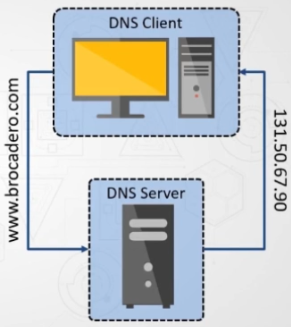

And this exists, quite simply, because as human beings, we remember names much more easily than IP addresses. Again, the example, www.brocadero.com, it's easier to remember that than 131.50.67.90. And even if you think, well, that number is not really all that hard to remember, that's fine. But we are talking about every IP address on the Internet. So there would never be any way that you could remember the IP addresses of all the sites that you want to access. And even then, you might think, well, I don't even know the names, I just search. Well, that's fine too, but the search results would be quite meaningless if they pull back nothing more than a bunch of IP addresses. We see descriptions. We see domain names underneath the description. So again, we just click on the link because we recognize the names. From that point, it still has to be translated to an IP address. 

So again, ultimately the IP address must be known for communications to occur. We use various means to find the Internet resources we want, but we almost never specify the actual IP address. 

Now, DNS consists of a distributed, hierarchical database stored on separate DNS servers on all networks that connect to the Internet. Now, in an upcoming presentation, we'll talk about two different types of DNS, internal versus external. So for the time being, we are referring to the Internet, which is external. 

But the idea of it being distributed means that it is not all on one server, and that would just be entirely impractical. If there was a single server that had to handle all of those name resolution records for the entire Internet, it would just never work. It might be able to handle the number of records. Large scale databases can handle hundreds of millions of records. But it's the process of resolving those requests when a client says, here's a name, find the IP address for me. That would never be able to be handled by a single server. So, we see multiple servers that have just portions of the database stored on it, and then it's also broken down into this hierarchy, levels. And the name that you see there, www.brocadero.com, does indicate those levels. Now, we'll talk about that in greater detail later, but the www actually refers to a specific host. Brocadero refers to the organization, and of course, there could be multiple hosts within that organization. .com refers to a higher level where, of course, there are many organizations within that level, but that's the idea of a hierarchy. As you move through the hierarchy, you go from level to level to level, and you ultimately arrive at the destination. So again, we'll talk about that hierarchy in greater detail later on. So the DNS servers store, maintain, and update parts of the database for which they have authority. And consult them when responding to requests to resolve the specified host names into IP addresses. In simpler terms, that means, again, that if you are the administrator of brocadero.com and you want to have a publicly available website, then you have to register that site. And you have to inform the public Internet, for lack of a better description, that this is the DNS server responsible for resolving all names within brocadero.com. Again, maybe your web server, your mail server, your FTP server, an application server that might be available, it doesn't matter. But you can have as many addresses as you want that might be available to the public Internet, but it's up to you, you manage it. So you create what's known as an authoritative DNS server. And it's your job to make sure that server responds to the requests coming in from the Internet. And says, here you go, here is the address for that system. And since I'm the authoritative system, do not listen to anyone else. So if somebody tries to say well, here's a different record, they simply will not listen to it. Because they are not publicly registered as the authoritative server. So again, that's how you break the Internet down into these smaller portions. And you define who is responsible for which portion. 

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices2DNSStructure"></a>
***
###### 2. DNS Structure
***

Earlier we discussed some of the basics of DNS. So in this presentation, we'll take a closer look at the structure and the hierarchical nature of the database. As well as comparing internal to external DNS. And these are the two implementations I touched on earlier as well. 

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices2DNSStructureInternal"></a>
***
###### Internal
***

But internal means that all of the members that are participating are likely part of an internal domain. Now, that doesn't really describe a whole lot, but let's hold that thought for a moment. So when any system is requesting a name resolution to an IP address, it will use a local DNS server for any DNS name resolution tasks. So what does this look like? This is you at work in your office, interacting with the servers that you need to contact on a daily basis to do your job. You submit print jobs, you copy files from servers, you retrieve your email. But all of those servers are all within the internal organization. So none of this ever touches the public Internet. And the IP addresses that you would be getting back from the DNS server would almost always be a private IP address. So print server 1 is 10.0.50.5, something along those lines. That's a private IP address. So, the applications that you use typically still involve submitting names, because you still might not know the IP addresses. So you're internal DNS servers are still responsible for translating that name into an IP address. But again, none of it ever leaves your environment. It's all behind your router or your firewall. 

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices2DNSStructureExternal"></a>
***
###### External
***

So external is effectively the exact opposite. The members that are participating likely belong to a different domain other than your own. So you will use an Internet DNS server to obtain any information about the network. So what does this look like? This is still you at your office, but now you are trying to get to a website that is any other site other than your own. So some other company, for example, or just any site, it doesn't matter. Your DNS server within your own local environment is not responsible for resolving the name of somebody else's server. So it forwards the request out onto the public Internet and it will use either the DNS server of the other side, whoever that might be. Or it might use something like a hosted DNS server. And we'll see that in a moment. But again, the idea is it's any kind of name resolution request for a system that is not in your network. 

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices2DNSStructureExternalThirdpartyCloudhostedDNS"></a>
***
###### Third-party and Cloud-hosted DNS
***

So with respect to that Internet DNS server, what does that refer to? Well, again, every little environment, every portion of the Internet has to have a DNS server somewhere that is responsible for resolving the name request. And that can be your own server. In other words, if you have an Internet presence within your organization, then there does need to be a DNS server that is publicly available to handle the name resolution request, such as your website. So you can implement a publicly available Internet-based DNS server within your own environment, but it would not be the same DNS server as the one you use internally. In other words, you submit a print job, it is your internal DNS server that resolves that name. When someone from the outside wants to get to your website, they still have to find a DNS server, but it would not be the same one. Typically this would look like a web server and any other server that needs to be publicly available in a demilitarized zone. A perimeter network that is separated from your internal network by a firewall. Also out there in the perimeter network is the publicly available DNS server for that website. So that's the one that handles the name resolution request for your website. But everything you do on the inside is handled by the internal DNS servers. And those two servers do not talk to each other. Because if you only had one to handle everything, the internal and the external, you would have to expose all of your internal IP addresses to the public Internet. And that leaves you wide open for attack. So you have two completely separate, and separated by a firewall, DNS servers. 

But that can introduce some problems because, let's say you are a small to medium-sized organization. And you do set this up exactly like that, a web server and a DNS server in a demilitarized zone and it's working fine. But if that DNS server goes down, you lose your entire Internet presence. Because no one is resolving the name request for the people trying to get to your web server. 

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices2DNSStructureExternalThirdpartyCloudhostedDNSInternetDNSservers"></a>
***
###### Internet DNS servers
***

So these mystical Internet DNS servers often are third party DNS servers, or cloud-hosted. These offer several improvements, such as speed, reliability, parental controls, phishing protection. And you can see, improved scalability, reliability, and availability with cloud providers. 

So, this is you simply saying, I need an Internet presence, but I don't want to handle the DNS, so you subscribe to the service of someone else. Web providers, web-hosting companies offer these services. Many Internet service providers offer these services, as well. And they have, in a lot of cases, more resources to dedicate to this service. So this is where you get the better speed, reliability, control, things along those lines. So it's up to you. You can implement your own DNS, both internally and externally. But often these third party providers might do a better and/or a more reliable job. 

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices2DNSStructureHierarchy"></a>
***
###### Hierarchy
***

So then looking at the hierarchy, it's comprised of the following elements, the root level, often known as the dot portion of the domain. And in fact, when you enter a domain name into a browser, such as www.brocadero.com, it's actually www.brocadero.com dot. It ends with the dot. It's just not displayed. But this represents where you start looking, you have to start somewhere. So DNS servers are programmed with addresses for root servers so that your DNS server in your environment, if it's looking for a web-based name and it doesn't know where to start looking. It starts at the root domain. The root servers only need to know about the next level down. The top level domains, .com, .ca, .gov, .edu, .org, the extensions we're all familiar with. So it forwards the request to the appropriate top level domain. And if I'm looking for brocadero.com, in this case it would send it to a .com server. One of the .com servers would have a publicly registered entry for brocadero. If I want to within brocadero, if that's my organization, I can subdivide it into something like east and west or sales and marketing, or anything along those lines. Now that's your call, you don't have to do that. And then finally, at the most specific level, we have the host. So www actually refers to the web server. mailsrv1 would refer to the mail server, and that might be in one of the subdomains, but it doesn't really matter where it is. That's where you get to the actual specific host system, so each level of the hierarchy only needs to know about the next level down. And that's how you ultimately find the appropriate system. 

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices2DNSStructureHierarchyForwardandReverseZones"></a>
***
###### Forward and Reverse Zones
***

Now, that being said, there are also two different types of zones, forward and reverse. 

And it's quite simply the direction. A forward, by far the most common, simply converts names to IP addresses. This is commonly used for websites and it's pretty much what we use everyday. 

The opposite is the reverse zone and this simply does the same thing in reverse. It converts an IP address into a domain name. So in other words, it's the scenario where you actually know the address and might not know the name. So commonly used in network troubleshooting to determine if this particular IP address is being converted to the correct name.

So again, those are some of the basic characteristics of the DNS service, and as mentioned earlier, perhaps one of the most important networking services of the Internet. 

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices3SOArecords"></a>
***
###### 3. Start of Authority (SOA) records
***

In this presentation, we'll take a look at the SOA, or Start of Authority, record in DNS. 

This defines general parameters for the DNS zone, including, and perhaps most importantly, the identity of the authoritative server for the zone. 

Now each zone contains a single SOA record, which specifies a single server as the authoritative server. So particularly for Internet DNS names, the process is, I want to register www.mycompany.com, I have to go to a public registration company and say here's the name. And I must then specify a DNS server somewhere. It can be my own or it could be through a provider of some kind, or even the public registrant themselves. But a server somewhere has to be marked as authoritative for that domain name. Once that is all done, once it checks out, if you will, then it is marked as authoritative. And this prevents anyone else from just coming along and creating another zone and saying no, I'm authoritative. Because there can only be one SOA record with one authoritative server. So once yours is publicly registered, no one else can also be authoritative for that zone. So other public DNS servers will only ever forward name resolution requests for that domain name to the authoritative server. So, again, it protects your zone and prevents someone else from, quite literally, stealing your DNS name. 

Now you can search for more about SOA records in RFC 1035. It just discusses the implementation and the specifications for domain names and how SOA records work. 

But they have various properties within the record that define everything you see here. The current zone for which this server is authoritative. A class, which is typically IN for Internet. We'll see that a little bit later. The type of record, which in this case, is quite literally the SOA record. It specifies, this is the record designating this server as authoritative and all of these other properties as authoritative. The primary master is the server itself, so the IP address. A contact email, if somebody wants to contact you about that domain name. A serial number, which is used for if you are replicating the zone information to other servers for redundancy, this ensures uniqueness and that no conflicts ever occur. A refresh time for when clients should simply refresh the values to ensure they are correct. A retry time, if they are unable to connect, they should continue to retry for this amount of time. An expiration time, which is generally for the entire registration itself. So if, for example, you registered it for two years, that would be the expiration. And the TTL, or time-to-live, is how long that specific resolution request is valid for. So it is possible that the IP address might change, for example. So you can set a TTL, really, at any value you want, but it does mark a validity period for this name equaling that IP address. So, again, should the address change, the TTL should be updated. But, in essence, they just define those overall properties for the zone.

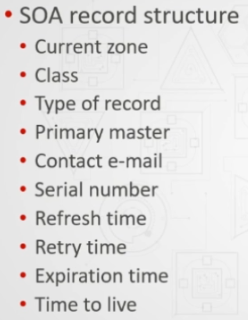

But, again, the key component is the fact that it ensures the uniqueness of the name and prevents someone else from trying to become authoritative for your DNS zone. 

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices4RecordTypes"></a>
***
###### 4. Record Types
***

Now in this presentation, we'll take a look at some of the other types of DNS records, beginning with NS, or name server, records. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Name Server - NS
***

These list the name servers for the domain, and allow other name servers in other domains to locate names in your domain. So these are used when you have more than one name server in your zone. And that's especially common in large zones. Because if you only had a single name server, for example, the authoritative name server, then it would be responsible for handling all name resolution requests, which might simply overwhelm the server. Plus, it would be a single point of failure. If it went down, the entire zone would be inaccessible. So you can have as many other name servers as you want to spread the load and increase the fault tolerance of your zone. So when you create the records, the Name is the domain that will be serviced by this name server. [For example, contoso.com. ] The AddressClass is IN for Internet. The RecordType is NS for name server. And the Name Server Name sounds a little redundant but it is the name of the name server. So the fully qualified domain name of the server responsible for the domain. [Fully qualified domain name is abbreviated as FQDN.] 

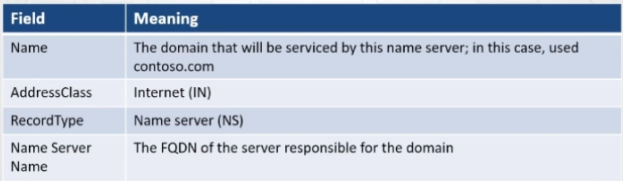

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### A Records
***

The A record makes up the bulk of almost every DNS zone database. "A" simply stands for "address", and they're often referred to as host records. They are certainly the most basic type of DNS record, because it is quite simply the mapping of host name to IP address. And if it's IPv4, the A record resolves a 32-bit address. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### AAAA Records
***

But if you're using IPv6, then there is a AAAA record to resolve those. And they simply have four As because 32 times 4 is 128. But if you're using both protocols, you actually need both the A record and the AAAA record. The inverse of the A record is the PTR, or pointer, record. These are stored in reverse lookup zones so that a DNS name can be retrieved from a known IP address. This is sometimes used to validate that the source of a trusted domain's communication, such as email, is coming from the correct IP address for that domain.

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Mail Exchanger Record - MX record
***

The mail exchanger record, or MX record, is used to specify servers that are configured to accept mail on behalf of the domain. So when you send an email, for example, to any given domain, there has to be an MX record that indicates this is the mail server that will accept that mail and process it. So the parameters include the mail server itself and a preference, which is used to specify a server when there's more than one MX record present. So you can see an example here. The domain it services. IN for internet. MX as the mail exchanger. And again, if there is a preference, you could specify mailserver1 as the preferred server. [The record example is as follows: domain IN MX preference mailserver_host. ]

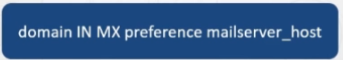

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Service Record - SRV Record
***

SRV records are service locator records. They enable clients to query DNS servers for the location of servers providing a specific service, such as a domain controller, because they provide the ability to log on. So it enables more efficient management and distribution of log on traffic, particularly in larger networks. Now that's only one example, but the idea is that it's certainly fine to have the name and address result. But in many cases, you need to know as well, what can the server do for me, what type of services does it provide? And logging on is just a perfect example. This allows the clients to say well, who are the logon servers? It's not just the IP address I need, I need this particular type of service, this particular type of request handled. Which servers handle those types of requests? And DNS can actually send back that information in the form of SRV records. 

So there are seven pieces of information in an SRV record. 

The Domain name, the domain for which this record is valid. Which incorporates a service name such as LDAP, Lightweight Directory Access Protocol, over TCP in brocadaro.com in this example. [The full domain name is as follows: Idap.tcp.brocadero.com. ] 

Its time to live, 86,400 seconds is one week. [Time to live is abbreviated as TTL.] 

The Class, this field is always IN for Internet. 

The Record type is simply SRV. 

Priority and Weight are similar. But Priority specifies a preference, that if you have a lot of servers there might be some with the same preference, so if equal priority is specified, then it considers weight. So let's say you had five servers that all had a priority of 3. Within those five servers, it would then look at the weight. And if the weight is the same, you're basically saying any one of those five is fine. You can kind of round-robin the request if you wanted to by specifying a weight of 100, 200, 300, 400, so on. 

The Port number is the port where that server is listening for that service. In the example of LDAP, it's port 389.

And the Target is a fully qualified domain name of the host computer, dc1.brocadero.com for example. [Other target examples are hsv.contoso.com and msy.contoso.com. ] 

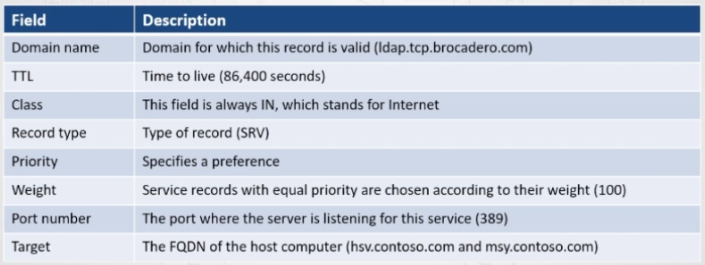

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Text (TXT) Record
***

Now the TXT, or Text, record is used to provide additional information about a named service. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Sender Policy Framework - SPF
***

And one common example is an SPF, or a Sender Policy Framework network. This is the type of TXT record used to identify mail servers that are permitted to send mail on behalf of any given domain. This is effectively used to prevent spammers. So I can explicitly say, this mail server is permitted to send mail on behalf of our domain so that it is not identified as a spammer. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### DomainKeys Identified Mail - DKIM
***

You might also see a DKIM, or DomainKeys Identified Mail, which is also used to validate the organization delivering email. It's not uncommon that sometimes you need to send mail through someone else. And in that case, you're basically saying that this server in a different domain is actually allowed to send mail through this other organization. They might be a provider of some kind or a partner organization. Things along those lines. So these validate that the server is allowed to do so.

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Canonical Name - CNAME
***

Finally, a CNAME is a canonical name, also referred to as an alias record. This is used to point one domain or subdomain to a different hostname where an ``A`` record already exists. Quite simply, it's an alternative name for any other existing A record. And it doesn't necessarily have to be from one domain to another or a subdomain to a parent domain. Even within the same domain, you might simply want more than one name for the same address. So, for example, you might have a web server. And it might be listed as www.mycompany.com. So its hostname is www but it might also provide the FTP service, and it's the same server. So you want people to access the FTP service by ftp.mycompany.com. So same server, but we need two different names. So you would create a canonical name for the other type of service. So you can create as many nicknames, if you will, as you want for any given server. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Conclusion - DNS Zone Database
***

So those are just some of the different types of records you'll encounter as you start creating your DNS zone database.

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices5DHCPService"></a>
***
###### 5. Dynamic Host Configuration Protocol (DHCP) Service
***

In this presentation, we'll take a closer look at DHCP, or the Dynamic Host Configuration Protocol.

This was implemented to replace manual assignments, particularly in very large environments. If you had thousands of clients, it would take a very long time to manually configure each one. Plus, you're much more vulnerable to simple typos and mistakes. 

So this is used to automatically configure the IP address, the address of the default gateway, the subnet mask you are using, and various other options. Most commonly, the DNS servers that you are using. 

And this has become the preferred method for dynamic assignment of IP addresses. As long as the scope, or the pool of addresses on the server is configured correctly, then you can rest assured that the clients are getting a valid IP configuration free of errors.

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### 1. ``DHCPDiscover``
***

So the process is that a client is configured to obtain an IP address automatically. And for Windows systems, this is the default. In the properties of TCP/IP, it is set to obtain an IP address automatically. So when the client boots up and realizes this, it sends out a DHCP discover packet. 

This is a broadcast that is used to locate DHCP servers on the network. And it has to be a broadcast because you don't yet have an address, so you initialize a basic form of TCP/IP that is only capable of broadcasting. Now, since broadcasts heard by everyone, the DHCP server will hear it. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Automatic Private IPv4 address - ``APIPA``
***

But if for some reason you can not reach the DHCP server, just because of general network issues or the server going down, then the client will assign itself an Automatic Private IPv4 address, or (APIPA), in the event that it does not get a response. Recall, APIPA assigns a 169.254.something.something address. So it's not particularly useful in terms of communicating, but it is useful in diagnostics. Once you see that address, you know that there is a problem communicating with the DHCP server, then you can begin troubleshooting. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### 2. ``DHCPOffer``
***

So assuming that the server does hear the request then it will send back a DHCP offer. 

So it offers up an address with the lease information to the client. Basically saying, here are the properties of this configuration. How long it's valid for and various other configuration options. But this is also a broadcast because, again, the client does not yet have an IP address. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### 3. ``DHCPRequest``
***

Since the original message was a broadcast, not only will this particular DHCP server send out an offer, but all DHCP servers will send out offers. You may have more than one. So when a client receives an offer, it can accept it by again broadcasting the DHCPRequest. So it says, I like this one. I like that lease. That's the one I want to use. So again, in the event that there are multiple DHCP servers, the client will typically accept the first one at receipt. At which point, the other servers will withdraw their offers. So things start to quiet down a little bit but these are still broadcasts because you still do not have the IP address yet. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### 4. ``DHCPAck``
***

Finally, the DHCP server will send out a DHCPAck, or acknowledgement. This is the server saying, all right, you may have that address. And it includes the least duration and other details, but basically this is the server saying, everything checked out. You may now start using that address. Once you receive the acknowledgement, now you have the IP address. You can bind it to your adapter and you can stop broadcasting.

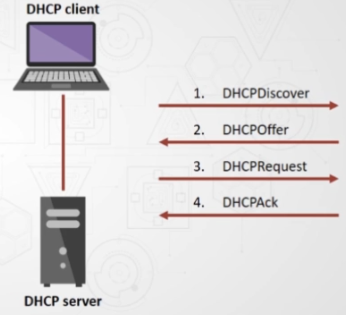

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### ``DHCPNack``
***

Now there are a few other types of messages, the DHCP NAK is a negative acknowledgement. And this is issued when the address requested by the client cannot be used. For example, it's already in use. Perhaps some other DHCP server already assigned that address, so we can't configure a conflict in addresses, so you'll get a negative acknowledgment. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### ``DHCPDecline``
***

A DHCPDecline is issue when a client determines that there's something in the configuration that is invalid. May be the subnet mask is not right. Something along those lines. So the client will simply say, no, I don't want that one.

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### ``DHCPRelease``
***

And then you might also see DHCPRelease message. Which is issued by the DHCP client to release the IPv4 address and effectively cancel any remaining leases. That is also something that is commonly used in troubleshooting. If you cannot communicate, you can simply discard your configuration then request a new one by performing an ``ipconfig/release`` then ``ipconfig/renew``.

That basically just requests a new configuration. And if you get a different address, for example, and then everything starts to work, you can assume that there was something wrong with the previous configuration. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Conclusion - Assign all Clients Automatically
***

So again, the whole idea is to effectively assign all of your clients in an automatic fashion so that you do not have to go from system to system to system manually configuring these values. And again, you can ensure that as long as the scope is correct, that your client configuration will be correct as well. But from time-to-time, there can be issues, so some of those other types of messages may be encountered when you are examining things, like the Windows event log. You might see some of those different types of messages from time-to-time when troubleshooting. 

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices6NetworkTimeProtocolNTP"></a>
***
###### 6. Network Time Protocol (NTP)
***

In this presentation, we'll take a look at NTP, or the Network Time Protocol. And this is a hierarchical protocol that is divided   [A diagram, NTP, displays. This is a layer of clocks and three layers of servers. The clock layer has three clocks, each connected to three servers in the first layer of servers. The second and third server in layer 1 connect to each other. The second layer of servers has four servers. The first server in layer 1 connects to the first and second server in layer 2, the second server in layer 1 connects to the second and third server in layer 2, and the third server in layer 1 connects to the third and fourth server in layer 2. Layer 3 has 6 servers. The first server from layer 2 connects to the first server from layer 3. The second server from layer 2 connects to the second and third server from layer 3, with these servers also connecting to each other. The third server from layer 2 connects to the third, fourth, fifth and sixth servers from layer 3, with the fourth and fifth servers also connecting to each other, and the fifth and sixth server also connecting to each other. The fourth server from layer 2 connects to the fifth and sixth server from layer 3.]  into what's known as stratum levels, which allow you to define a distance from a reference clock. Now, I'll come back to that structure in a moment, but the reason why this protocol exists is because there are a number of network functions that are time-dependent, or at least time-sensitive. And one common example is when you log in. If you are in a Windows environment, in particular, running Active Directory, there are servers known as domain controllers which process the login request. They use a protocol known as Kerberos to handle the authentications, and provided you supply valid credentials, you are issued what's known as a Kerberos ticket. And this is like a little security badge that you use to show whenever you need to access a resource. 

So, if for example, you simply want to get to a file on a file server, the file server will say, hold on, show me your ticket. So if the server that issued you the ticket and the file server don't agree on what time it is, there can be problems. Because the Kerberos ticket has a timestamp that says when it was issued and how long it is valid for. They aren't valid indefinitely. If you just get up and walk away from your computer, for example, after logging on and your computer does not go to sleep, the session will ultimately timeout. So that someone else doesn't come along and use your system to access resources. 

So let's imagine you are approaching the timeout period. If you try to access that file and, again, the two servers do not agree on what time it is, then the file server might say, hold on a second, that ticket has already expired. Even though from the perspective of the domain controller, it has not. So you could end up with these problems, with respect to that disagreement in time. 

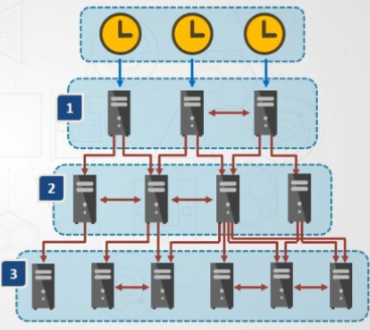

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Stratum 0
***

So that's where the levels come into play. And Stratum 0 is, of course, the highest level, and represents the clocks themselves. And typically, these are exceptionally accurate devices, such as atomic clocks or GPS clocks. But these aren't standard networking devices, and we don't have atomic clocks in our LAN environment. So we don't have standard network connections to these devices, so they're used as the reference clock, the synchronization source. Everything begins there, but the systems that are in Stratum 1 would have proprietary interfaces to those clocks. Now that they have synchronized by those clocks, they can act as the source for the next level down. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Stratum 1
***

So in Stratum 1, we do see now the most accurate NTP time sources that are accessible by standard network connections. So Stratum 1 devices are typically synchronized by the Stratum 0 reference clock. But once they have been given the time, they will handle the distribution of that information to the servers in the lower levels. Now, each one can synchronize with the source itself, but you'll also see there are some horizontal arrows, which means that they can also pull each other to say, well, I got time x, did you get time x? In other words, they can compare and they can adjust for any kind of lag or offset or latency in the communication itself.

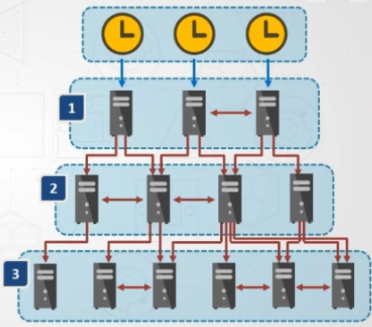

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Stratum 2
***

So Stratum 2, in essence then just does the same thing as 1 does with respect to 0. So as far as 2 is concerned, 1 is the highest level. So they are synchronized from Stratum 1 using standard network connections. 

Now, they might not be as accurate as Stratum 1 servers, because there can be delays, and effectively jitter in network communications. But this of course is why they are able to pull each other. Plus, they can also take into account how far they are from the original source. Because there is some kind of delay in all network communications, they can actually accommodate for that delay. So if the server says it's time x but we know that the packet took, let's say, time interval of y to reach us, well, then we can calculate what the actual value was in terms of the original source value. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Stratum 3
***

And then finally, in Stratum 3, these computers are synchronized by way of Stratum 2 servers. And they employee the same algorithms used in Stratum 2. And they can in turn act as servers for Stratum 4 computers. So, in other words, this hierarchy can just keep going and going. But like anything in a hierarchy, ideally you want it to be as simple as possible. Because the farther away you get from the original source, the more likely you are to encounter skew with respect to the actual time. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Conclusion - Domain Controllers Subscribe to a Microsoft Time Service
***

So again, in a standard LAN environment, we don't have access to the GPS and the atomic clocks. Typically, your domain controllers are set to subscribe to a Microsoft time service. That time service would be Stratum 1. So again, we don't have direct access to those atomic clocks. We have access to Internet-based services that reside at Stratum 1. Then your domain controllers would effectively be Stratum 2. They then can be the synchronization source for all other servers and all other clients in your environment, which would effectively represent Stratum 3. Pretty much, that's where it tends to stop. So that, again, we don't just keep going and going and going and increasing the likelihood of that skew. So once that has been implemented, all of the systems in your environment will effectively agree on what time it is. 

< [Table of Contents](#top) | [References](#references) >
<a id="networkServices7IPAddressManagementIPAM"></a>
***
###### 7. IP Address Management (IPAM)
***

Now in this presentation, we'll take a look at IPAM or IP Address Management. And this is a service that provides IP version 4 and 6 address infrastructure administration and monitoring. 

Now that's actually a key word, the infrastructure, and I'll clarify that in a moment. But what it is you are managing are your DHCP and/or DNS servers themselves. So it offers enhanced IP address management, effectively all subnets that are managed by all servers, can be managed by IPAM. So that's what I meant when I said infrastructure is the key word here. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### IPAM versus DHCP
***

A lot of people tend to ask me, well, what is the difference between IPAM and DHCP? They are both for managing IP addresses. Well, for starters, we see that DNS is also incorporated into the mix here, so that's one of the basic differences. But this isn't managing the clients like DHCP is. This is managing the servers. Your DHCP server is responsible for handing out the IP addresses to the client systems, that's its job. That's all well and good, but in the larger environments, you might have dozens upon dozens of DHCP servers. And dozens upon dozens of DNS servers. That, in and of itself, then becomes fairly complex to manage. You would have to go from server, to server, to server, or at least connect remotely to each one to see what they are all up to.

IPAM allows you to manage those infrastructure servers, the DHCP servers and the DNS servers, from a centralized location. So that I can see what all of my DHCP and DNS servers are doing within my environment. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### IPAM
***

So it's a complete integrated management of your IP address spaces, both dynamic and static. I can see which systems are statically assigned. I can see which ones are dynamically assigned. 

And I can create these customizable inventory views of the entire IP address space.

I can monitor both versions (IPv4 and IPv6), in terms of the address utilization. So I can see that this server has issued out this many addresses. 

And I can configure these usage alerts and notifications with respect to thresholds. Once a particular server reaches 90% of its available address base exhausted. Then I can ensure maybe that another server takes over and effectively balances and distributes the load a little more effectively. So that I don't have one server that's being heavily utilized and another one that's being entirely underutilized. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Multi-Server Management - MSM
***

It's a complete multi-server management environment. And again, that's the idea, you are managing the servers, not the clients. 

You can discover DNS and DHCP servers across an Active Directory forest. So again, in very large environments, I can find out all of the servers performing these services. 

And it offers configuration support of each DHCP server and/or scope. So I can not only monitor these servers, but I can actually get in and configure the servers. So you can, to a degree, still support your clients. Now, it's generally not meant to do that, but you absolutely can. 

It supports simultaneous updates for common settings across DHCP scopes and DHCP servers. So that if there is some kind of setting, such as the DNS servers that are consistent across these five servers, I can ensure that they are consistent. 

I can monitor the scope utilization. Again, keep an eye on how many addresses have been issued by any given server. 

And I can monitor the availability of those servers as well, if one of them goes down, for example, I can be alerted. 

And there is manual addition or removal of the managed servers. So if I have some DHCP and/or DNS servers that should not be managed by IPAM, I can remove them. Maybe there is an isolated group of servers that are handled by specific people, that's fine. You can add servers in, you can take servers out at any time. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Network Audit
***

It also supports network audit functions. You can query the event catalog for DHCP configuration changes using a single console. So I can see who is doing what with respect to any kind of change. 

I can create advanced queries to track users, devices, and IP addresses, at specified interval times as well. So I can have regular updates, if you will. 

I could export the audit findings to create reports. 

And I can resolve any kind of configuration problems a little more easily. Because again all of this is accessible from a centralized interface. I don't have to run around to all my different servers to see what they are up to. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Role-Based Access Control
***

Now it also supports role-based access control. 

I could use this to customize the types of operations and access permissions with respect to the specific objects in IPAM. 

There are standard groups. A local IPAM security group, a built-in IPAM role-based access group, and a custom IPAM role-based access group. 

Simply meaning, like all other role-based access groups, I define the permissions on the group. And then I simply determine which users should be in those groups. So I can create these local ones that would be just for that server only. Or use the built in and custom to create larger groups that can manage multiple servers. It's entirely up to you, but it's always the same approach when it comes to role-based access control. Determine who is able to do what over what kind of scope of servers. Place them into the appropriate roles, manage the permissions of the roles. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Virtual Address Space Management - VASM
***

And finally, you can also manage your virtual address space using IPAM.

This enables the same functions and capabilities for a virtual IP address infrastructure as a standard physical IP address space does, in terms of managing those servers. And again, recall that virtual address spaces are typically implemented for things like clusters, server farms for perhaps web servers. Load balancers, any kind of virtual machine networks that you create using something like Virtual Machine Manager, things along those lines. That basically just don't have a single physical interface dedicated to any particular address. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### Conclusion - Environment Management using IPAM
***

Point being, you can manage your entire address based, whether it's physical or virtual using IPAM. And It's typically implemented, again, in the larger environments where there are multiple servers handling those services. If you only had a single DHCP server and a single DNS server, that's not all that much to manage, so. Overlaying IPAM in that case might not really be much of a benefit. You can certainly still do so, but it's typically meant to be implemented in the larger environments where we have again, usually dozens of servers performing those tasks. So we can basically just get this higher level overview of the entire environment. And how our IP infrastructure is being implemented and utilized. 

< [Table of Contents](#top) | [References](#references) >
<a id="practiceConfiguringDNSRecordTypes"></a>
***
### Practice: Configuring DNS Record Types
***

i. describe how the DNS service works. 

ii. then to describe the different types of DNS records. 

iii. then to describe how the DHCP service works. 

iv. and finally, to list some of the features of IPAM. 

< [Table of Contents](#top) | [References](#references) >
<a id="exercisepracticeConfiguringDNSRecordTypes"></a>
***
###### 1. Exercise: Configuring DNS Record Types
***

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### i. DSN
***

The DNS servers maintain a database of IP address to host name mappings to resolve client queries. We, as users, like to refer to systems by using a name. But the TCP IP protocol requires an IP address. So we query the DNS server and we say, here is the name, please find the associated IP address. The DNS server will check the database, and if the listing is there, it will send back the IP address. And even if it's not there, it can possibly query other DNS servers to find it. So, ultimately, we can communicate using names instead of having to remember IP addresses. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### ii. Types of DNS Records
***

Then we asked about the different types of DNS records, and there were several. 

Beginning with the SOA, this is the start of authority. And this designates this particular DNS server as the authoritative server for this namespace. And this prevents other servers from being able to usurp your name. So you are responsible for handling all name resolution requests within that domain. 

Once you have that, you can establish additional NS, or name server records, to simply distribute the load. There are several other servers that can perform name resolution requests. They are the name servers.

The A, or the address records, are also known as the host records. And they are by far the bulk of virtually every DNS database. They are simply the mappings. This address is assigned to this host. 

And the AAAA record is the same thing for an IPv6 host. 

The MX record is your mail exchanger, the server that is designated to accept mail for your domain.

SRV are service locator records. So not only can I resolve a name to an IP address but I can find out which services this particular server can supply for me. 

Text records are typically used to implement which mail servers are valid. So that I could try to reduce spamming, for example. 

And CNAME is a canonical name, or an alias, just the ability to give any other host a different name.

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### iii. DHCP Service
***

Then we asked about the DHCP service. And for this, servers maintain a pool or a scope of available IP addresses that they can lease to clients. So clients boot up and request an IP address, the server hears this request and says, here you go, you can use this IP address. The client says, thank you very much. And in essence, will start using that address for a certain amount of time. So that you don't have to manually go around from system to system to system manually configuring each client. 

< [Table of Contents](#top) | [References](#references) >
<a id="___"></a>
***
###### iv. IPAM
***

And finally, IPAM is the management of the DHCP and/or DNS servers from a centralized console. In larger environments in particular, you might have dozens upon dozens of DHCP and/or DNS servers, and that can introduce a lot of overhead in terms of administration. IPAM allows you to collectively administer all of those servers to just try to reduce the overall administration required to maintain such a large environment.

< [Table of Contents](#top) | [References](#references) >
<a id="networkServicesTest"></a>
***
### ⚡ Test
***

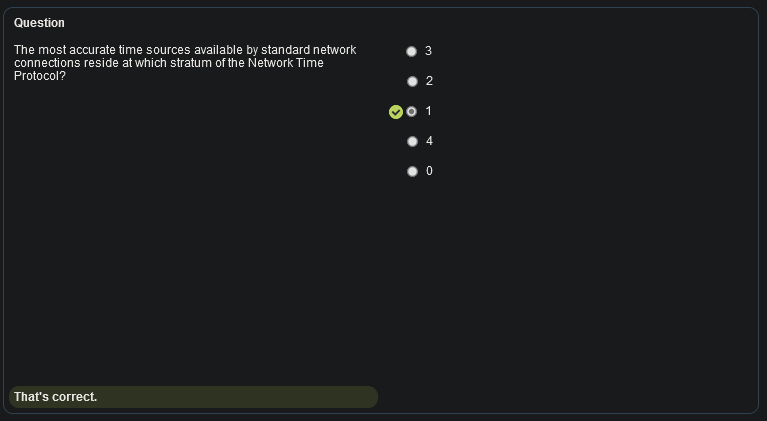

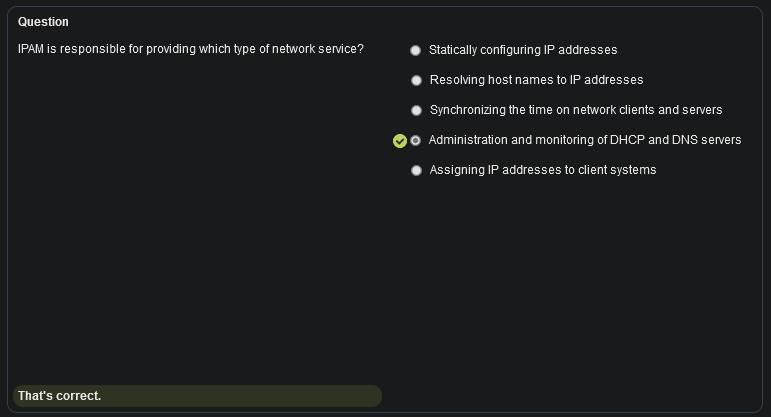

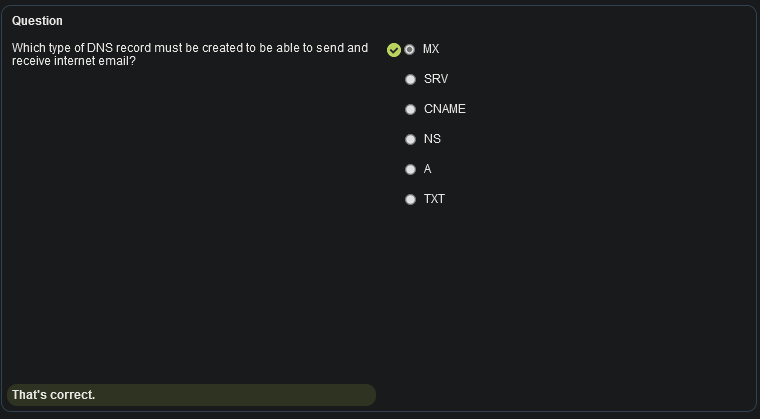

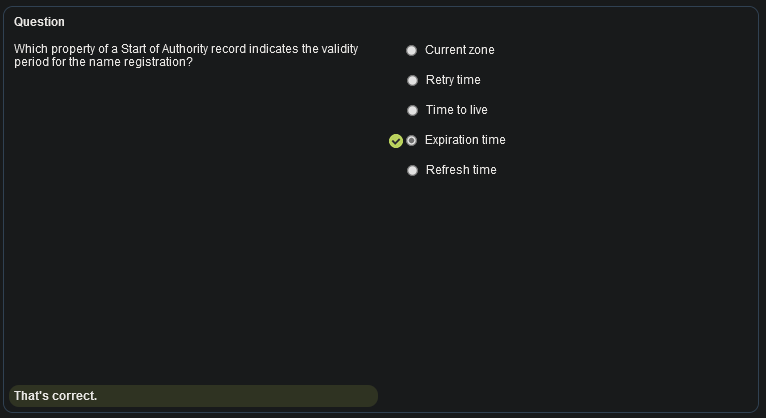

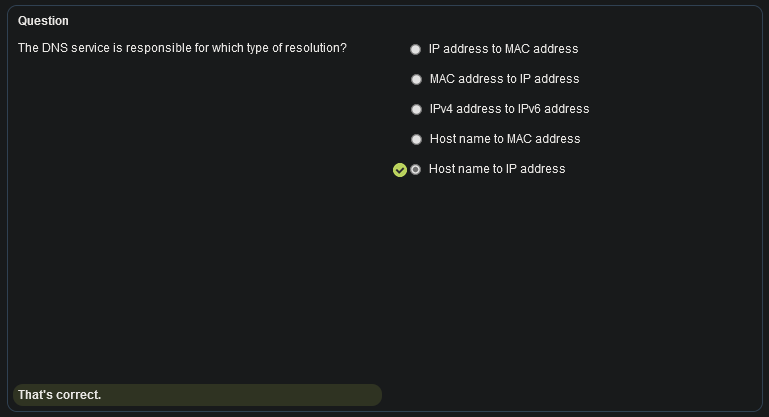

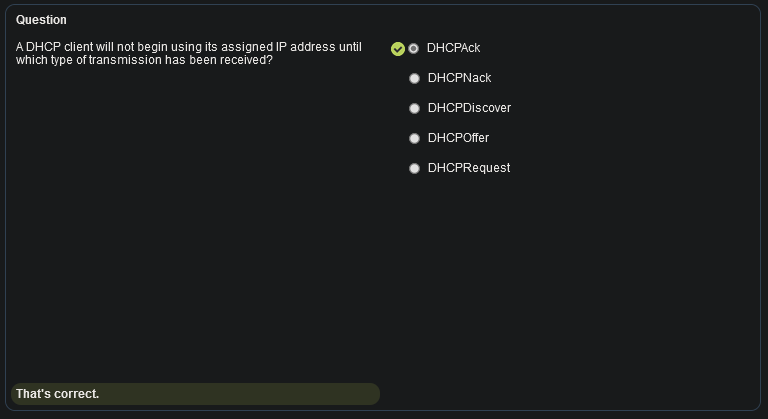

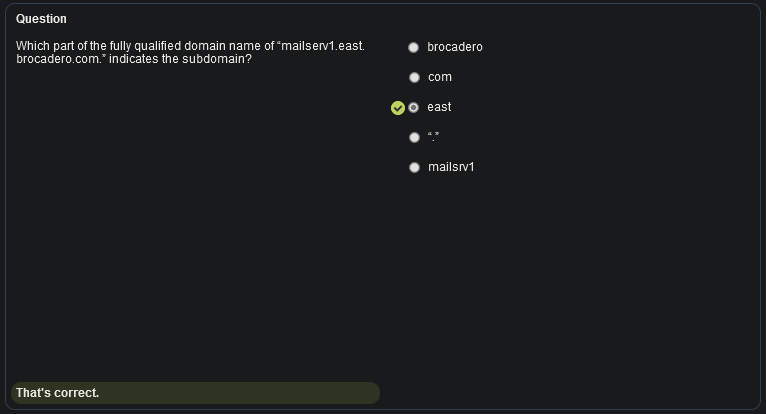

***
## END

< [Table of Contents](#top) >
<a id="references"></a>
***
## References
***

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

***
## END

# END JUPYTER NOTEBOOK